In [1]:
import os
import numpy as np
import glob
import PIL.Image as Image
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import models
from torchsummary import summary
import torch.optim as optim
from time import time

import matplotlib.pyplot as plt
from IPython.display import clear_output

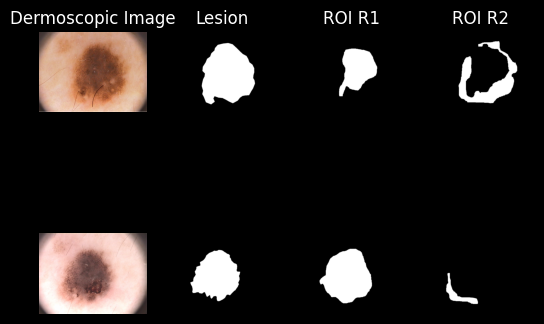

In [2]:
path = '/dtu/datasets1/02514/PH2_Dataset_images/'
fig,ax = plt.subplots(2,4)
ax[0,0].set_title("Dermoscopic Image")
ax[0,1].set_title("Lesion")
ax[0,2].set_title("ROI R1")
ax[0,3].set_title("ROI R2")
for idx,i in enumerate([2,4]):
    im_img_ph = plt.imread(path+f'IMD00{i}/IMD00{i}_Dermoscopic_Image/IMD00{i}.bmp')
    im_lesion = plt.imread(path+f'IMD00{i}/IMD00{i}_lesion/IMD00{i}_lesion.bmp')
    im_roi_R1 = plt.imread(path+f'IMD00{i}/IMD00{i}_roi/IMD00{i}_R1_Label4.bmp')
    im_roi_R2 = plt.imread(path+f'IMD00{i}/IMD00{i}_roi/IMD00{i}_R2_Label3.bmp')

    ax[idx,0].imshow(im_img_ph)
    ax[idx,0].axis('off')
    ax[idx,1].imshow(im_lesion)
    ax[idx,1].axis('off')
    ax[idx,2].imshow(im_roi_R1)
    ax[idx,2].axis('off')
    ax[idx,3].imshow(im_roi_R2)
    ax[idx,3].axis('off')

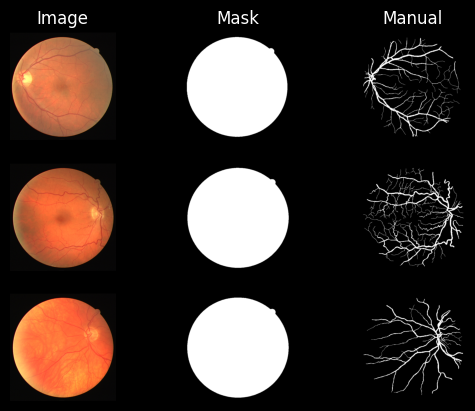

In [7]:
path = '/dtu/datasets1/02514/DRIVE/training'


fig,ax = plt.subplots(3,3)
ax[0,0].set_title("Image")
ax[0,1].set_title("Mask")
ax[0,2].set_title("Manual")

for i in [1,2,3]:
    
    im_mas = plt.imread(path+f'/mask/2{i}_training_mask.gif')
    im_img = plt.imread(path+f'/images/2{i}_training.tif')
    im_man = plt.imread(path+f'/1st_manual/2{i}_manual1.gif')

    ax[i-1,0].imshow(im_img)
    ax[i-1,0].axis('off')
    ax[i-1,1].imshow(im_mas,cmap='gray')
    ax[i-1,1].axis('off')
    ax[i-1,2].imshow(im_man,cmap='gray')
    ax[i-1,2].axis('off')

In [4]:
list_names = ['/dtu/datasets1/02514/PH2_Dataset_images/IMD368/IMD368_Dermoscopic_Image/IMD368.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD020/IMD020_Dermoscopic_Image/IMD020.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD137/IMD137_Dermoscopic_Image/IMD137.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD033/IMD033_Dermoscopic_Image/IMD033.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD385/IMD385_Dermoscopic_Image/IMD385.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD050/IMD050_Dermoscopic_Image/IMD050.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD365/IMD365_Dermoscopic_Image/IMD365.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD112/IMD112_Dermoscopic_Image/IMD112.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD075/IMD075_Dermoscopic_Image/IMD075.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD027/IMD027_Dermoscopic_Image/IMD027.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD088/IMD088_Dermoscopic_Image/IMD088.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD371/IMD371_Dermoscopic_Image/IMD371.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD243/IMD243_Dermoscopic_Image/IMD243.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD166/IMD166_Dermoscopic_Image/IMD166.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD125/IMD125_Dermoscopic_Image/IMD125.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD418/IMD418_Dermoscopic_Image/IMD418.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD426/IMD426_Dermoscopic_Image/IMD426.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD376/IMD376_Dermoscopic_Image/IMD376.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD368/IMD368_Dermoscopic_Image/IMD368.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD020/IMD020_Dermoscopic_Image/IMD020.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD395/IMD395_Dermoscopic_Image/IMD395.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD137/IMD137_Dermoscopic_Image/IMD137.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD033/IMD033_Dermoscopic_Image/IMD033.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD385/IMD385_Dermoscopic_Image/IMD385.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD435/IMD435_Dermoscopic_Image/IMD435.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD050/IMD050_Dermoscopic_Image/IMD050.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD365/IMD365_Dermoscopic_Image/IMD365.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD112/IMD112_Dermoscopic_Image/IMD112.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD138/IMD138_Dermoscopic_Image/IMD138.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD075/IMD075_Dermoscopic_Image/IMD075.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD027/IMD027_Dermoscopic_Image/IMD027.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD120/IMD120_Dermoscopic_Image/IMD120.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD088/IMD088_Dermoscopic_Image/IMD088.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD371/IMD371_Dermoscopic_Image/IMD371.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD243/IMD243_Dermoscopic_Image/IMD243.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD388/IMD388_Dermoscopic_Image/IMD388.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD166/IMD166_Dermoscopic_Image/IMD166.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD125/IMD125_Dermoscopic_Image/IMD125.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD405/IMD405_Dermoscopic_Image/IMD405.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD418/IMD418_Dermoscopic_Image/IMD418.bmp', '/dtu/datasets1/02514/PH2_Dataset_images/IMD426/IMD426_Dermoscopic_Image/IMD426.bmp']
list_yes = ["376","120","166","388","405"]
for i in list_names:
    for num in list_yes:
        if num in i:
            img = plt.imread(i)
            save_dir ='../../images/'+ num + '.png'
            plt.imsave(save_dir, img)

FileNotFoundError: [Errno 2] No such file or directory: '../../images/166.png'

In [10]:
from skimage.transform import resize

In [13]:
#True masks: 
list_yes = ["376","120","166","388","405"]
path = "/dtu/datasets1/02514/PH2_Dataset_images/"
for folder in os.listdir(path):
    for num in list_yes:
        if num in folder:
            print(path+folder+f"/{folder}_lesion/"+f"{folder}_lesion.bmp")
            img = plt.imread(path+folder+f"/{folder}_lesion/"+f"{folder}_lesion.bmp")
            img = resize(img, (512,512))
            plt.imsave(f'images/SAM/{num}_true.png',img)


/dtu/datasets1/02514/PH2_Dataset_images/IMD120/IMD120_lesion/IMD120_lesion.bmp
/dtu/datasets1/02514/PH2_Dataset_images/IMD166/IMD166_lesion/IMD166_lesion.bmp
/dtu/datasets1/02514/PH2_Dataset_images/IMD376/IMD376_lesion/IMD376_lesion.bmp
/dtu/datasets1/02514/PH2_Dataset_images/IMD388/IMD388_lesion/IMD388_lesion.bmp
/dtu/datasets1/02514/PH2_Dataset_images/IMD405/IMD405_lesion/IMD405_lesion.bmp


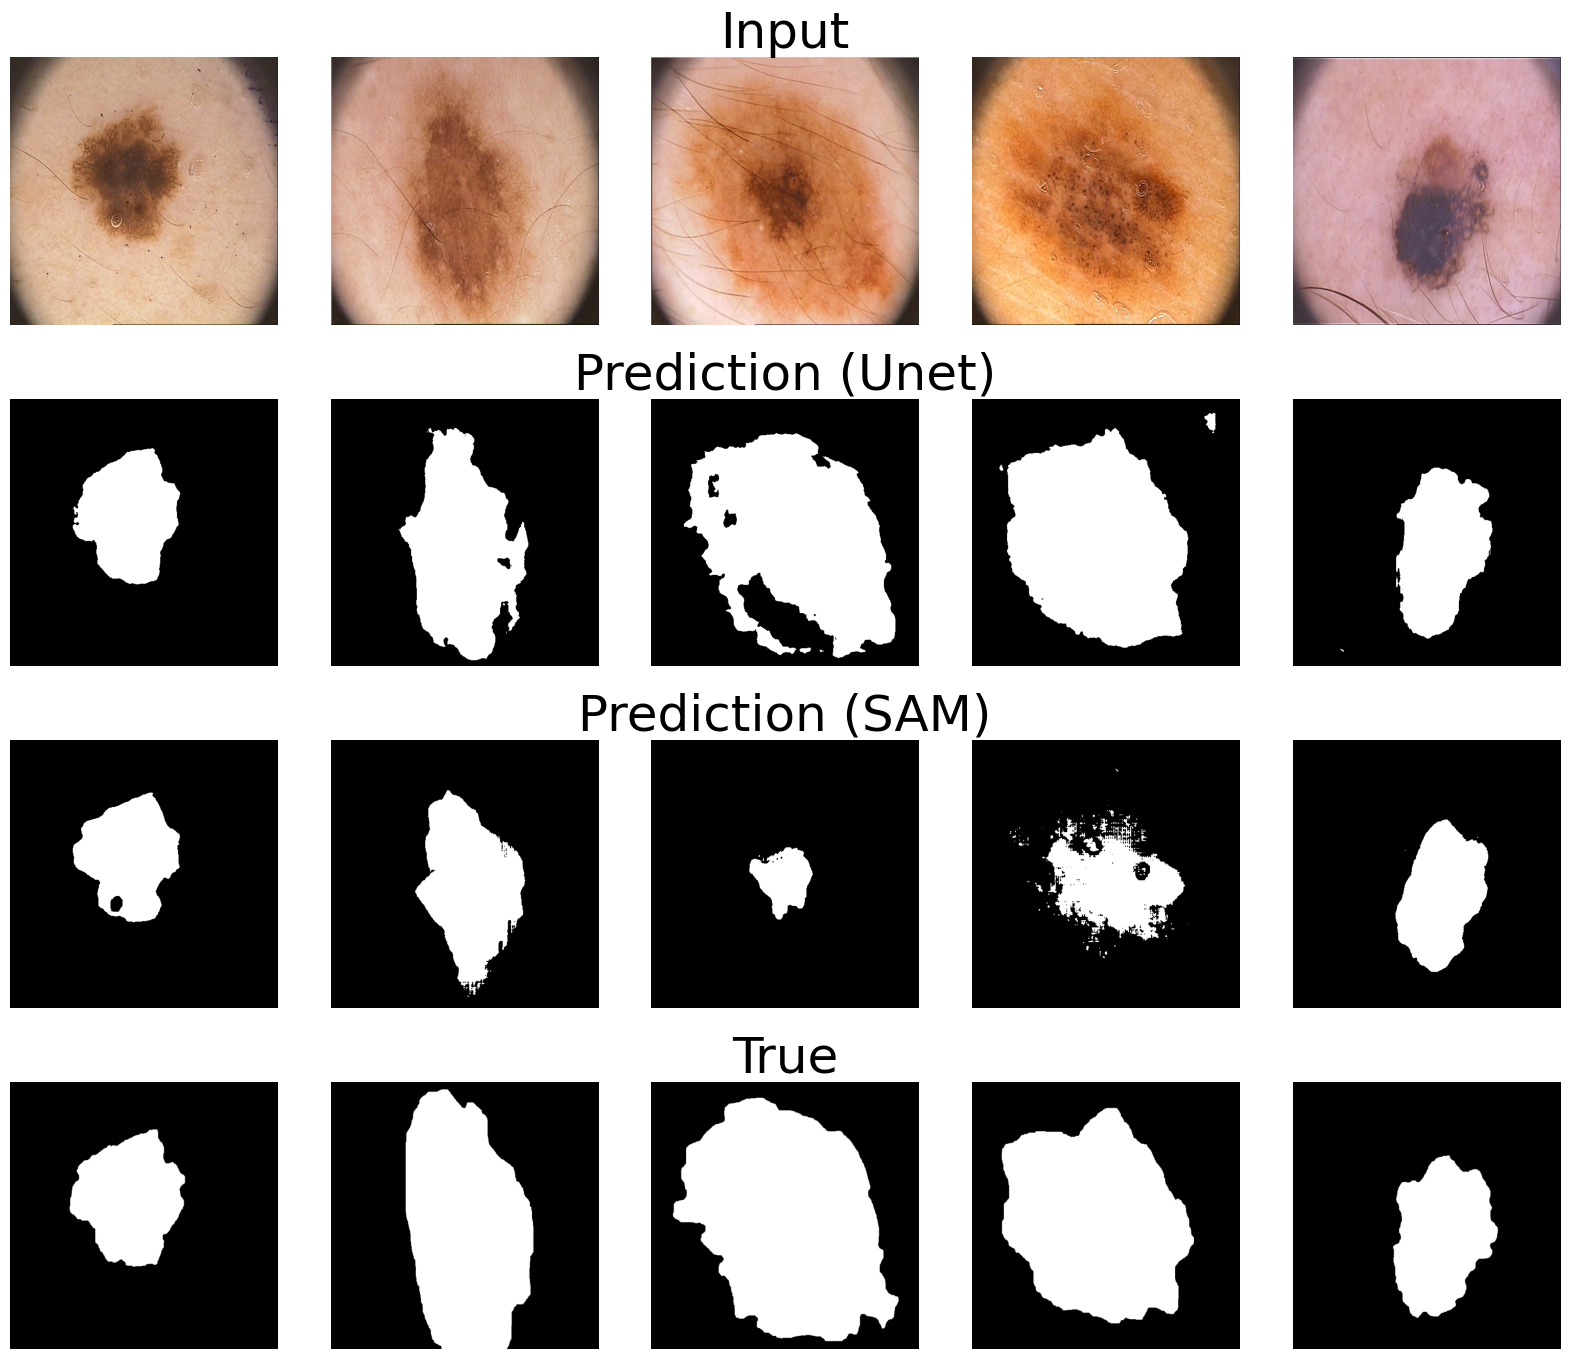

In [26]:
fig,ax = plt.subplots(4,5,figsize=(20,17))
path = 'images/SAM/'

for idx,num in enumerate(list_yes):
    img = plt.imread(path+num+'.png')
    img = resize(img, (512, 512))
    img_mask = plt.imread(path+num+'_mask.png')
    img_true = plt.imread(path+num+'_true.png')
    img_thresh = (img_mask[:,:,0] > 0.5)
    img_sam = plt.imread(path+'/SAM_masks/'+num+'.png')

    ax[0,idx].imshow(img)
    ax[0,idx].axis('off')
    ax[0,2].set_title('Input',fontsize=36)
    
    ax[1,idx].imshow(img_thresh,cmap = 'gray')
    ax[1,idx].axis('off')
    ax[1,2].set_title('Prediction (Unet)',fontsize=36)

    ax[2,idx].imshow(img_sam[:,:,0],cmap = 'gray')
    ax[2,idx].axis('off')
    ax[2,2].set_title('Prediction (SAM)',fontsize=36)

    ax[3,idx].imshow(img_true)
    ax[3,idx].axis('off')
    ax[3,2].set_title('True',fontsize=36)

plt.savefig('images/SAMvsUNet.pdf',transparent=True,bbox_inches='tight')

In [7]:
!pwd

/zhome/16/9/138488/02514/dl4cv
